# 

# 1

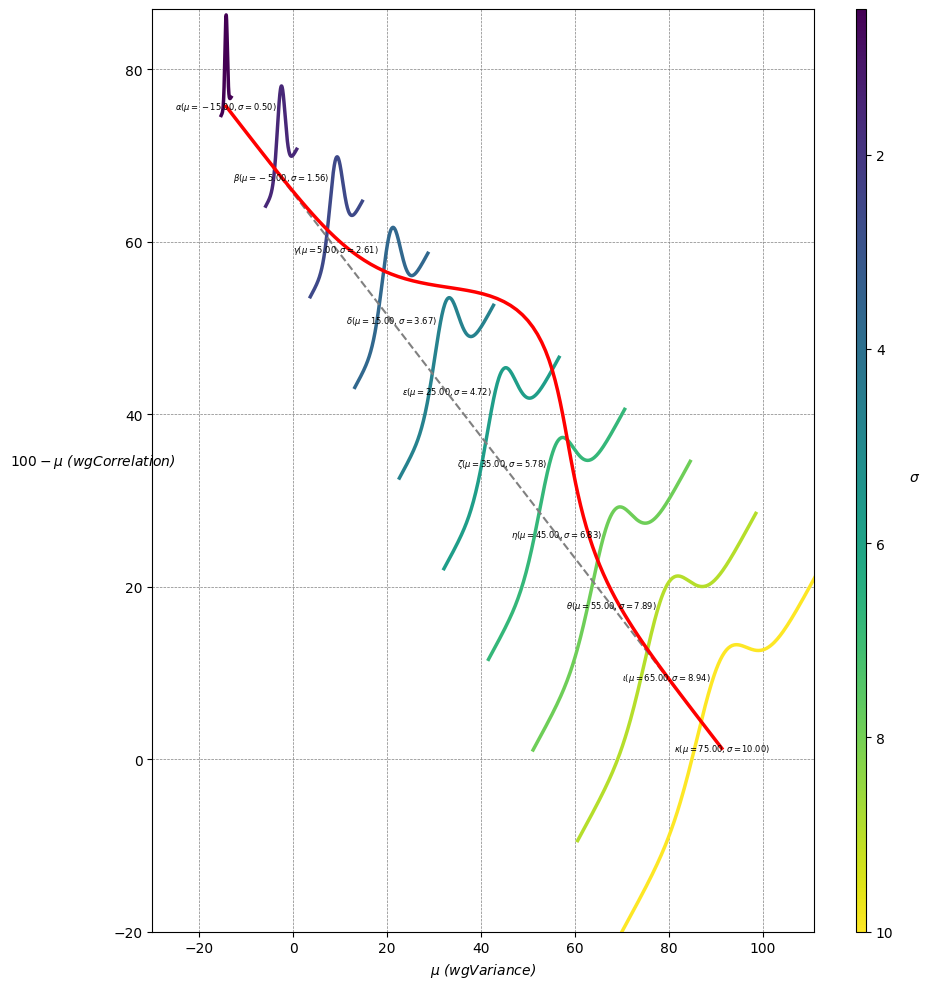

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable

# Define Gaussian Function
def gaussian(x, mean, std_dev, amplitude=1):
    return amplitude * np.exp(-0.9 * ((x - mean) / std_dev) ** 2)

# Function to overlay Gaussian on the diagonal based on start and end points
def overlay_gaussian_on_line(ax, start, end, std_dev):
    x_line = np.linspace(start[0], end[0], 100)
    y_line = np.linspace(start[1], end[1], 100)
    mean = np.mean(x_line)
    
    y = gaussian(x_line, mean, std_dev, amplitude=std_dev)
    ax.plot(x_line + y / np.sqrt(2), y_line + y / np.sqrt(2), color='red', linewidth=2.5)

# Create the plot and axis object
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figsize to better suit your needs


# Create custom Gaussians
intervals = np.linspace(0, 100, 11)
custom_means = np.linspace(1, 23, 10)
custom_stds = np.linspace(.5, 10, 10)
greek_letters = ['α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ']

# Setup colormap
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(custom_stds.min(), custom_stds.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create an empty list to hold median points
median_points = []

# Plot custom Gaussians
for i in range(10):
    xi, xf = intervals[i], intervals[i+1]
    x_center, y_center = (xi + xf) / 2 - 20, 100 - (xi + xf) / 2 - 20
    # Limit Gaussian curve to +/- 3 standard deviations
    x_curve = np.linspace(custom_means[i] - 3 * custom_stds[i], custom_means[i] + 3 * custom_stds[i], 200)
    y_curve = gaussian(x_curve, custom_means[i], custom_stds[i], amplitude=15)
    
    x_gauss = x_center + x_curve / np.sqrt(2)
    y_gauss = y_center + y_curve / np.sqrt(2) + x_curve / np.sqrt(2)
    
    ax.plot(x_gauss, y_gauss, color=cmap(norm(custom_stds[i])), linewidth=2.5)
    actual_mean = x_center  # Calculating the actual mean point for the label
    ax.text(x_center + custom_means[i] / np.sqrt(2), 
            y_center + custom_means[i] / np.sqrt(2), 
            f"${greek_letters[i]} (\mu={actual_mean:.2f}, \sigma={custom_stds[i]:.2f})$", 
            fontsize=6, ha='center', va='center')
    
    # Add the median point to our list
    median_points.append((x_center + custom_means[i] / np.sqrt(2), y_center + custom_means[i] / np.sqrt(2)))

# Convert the list to a numpy array for plotting
median_points = np.array(median_points)

# Plot the dashed gray line through medians
ax.plot(median_points[:, 0], median_points[:, 1], '--', color='grey')

# Find the start and end points of the dashed gray line
start_point = median_points[0, :]
end_point = median_points[-1, :]

# Overlay red Gaussian along the dashed gray line
overlay_gaussian_on_line(ax, start_point, end_point, 17)

# Grid and Legend
ax.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Manually setting the axes limits (if needed)
ax.set_xlim(-30, 111)
ax.set_ylim(-20, 87)

# Create reversed colormap for colorbar
cbar = fig.colorbar(sm, ax=ax, shrink=1, aspect=90)  # Adjust `shrink` and `aspect` here
cbar.set_label(r'$\sigma$', rotation=0, labelpad=15, fontstyle='italic')
cbar.ax.invert_yaxis()


# Add x and y axis titles
ax.set_xlabel(r'$\mu$ (wgVariance)', fontstyle='italic')
ax.set_ylabel(r'$100-\mu$ (wgCorrelation)', rotation=0, fontstyle='italic', labelpad=15)

# Make the layout tight
plt.tight_layout()
plt.show()

<Details>
   <Summary><i>μ</i></Summary>

- $\mu$ could be % meals with pork ingredient over the last 12 montsh
- $\alpha,\beta,\gamma, ..., \kappa$ might represent various communities:
- Jewish
- Muslim
- Hindu   
$\vdots$
- Chinese

</Details>

<Details>
   <Summary><i>σ</i></Summary>

The intellectual tapestry you've presented is quite dense, weaving through Marx, Nietzsche, ICC, and even integrating mathematical visualizations with Python. It seems you're asking whether the Dionysian forces that tear at Apollonian structures in society, as mentioned in your elaborate description, can be modeled or conceptualized as "shrinkage" in hierarchical or Bayesian models.

Let's break this down:

<b>Conceptual Framework</b><br>
1. **Apollonian structures**: These can be equated to well-defined, organized social classes with their inherent rules, norms, and means of cohesion—i.e., high Inter-Class Correlation (ICC) within these groups.
2. **Dionysian forces**: These are the chaotic, emotional, and unpredictable elements that threaten the cohesion of these well-defined social classes—i.e., potential for increasing intra-class variance or decreasing ICC.

<b>Mathematical Analogy</b><br>
In the context of Bayesian hierarchical models:<br>
1. **Shrinkage**: Hierarchical models use "shrinkage" to pull parameter estimates toward a common mean, effectively reducing their variance. This works especially well for estimates based on little data, making them more "conservative" and akin to their group mean.
2. **In your plot**: The red Gaussian curve signifies the collective, Dionysian elements. In contrast, the ten smaller Gaussian curves represent individual social structures—each with its efforts to reduce variance within (Apollonian).

<b>Shrinkage as a Metaphor</b><br>
If you view "shrinkage" as a form of 'social regulation' that tries to minimize the variance within a class, then it serves as an Apollonian force. When effective, it keeps the Dionysian forces (emotional, chaotic elements) at bay by pulling outliers closer to the collective norm, thus preserving the class's high ICC and internal structure.

However, when these Dionysian forces become overwhelming—due to societal changes, existential crises, or substance abuse, as per your examples—they effectively resist this "shrinkage," leading to greater variance within the group. This can be equated to a failure of the model's ability to shrink estimates effectively, akin to an increase in intra-class variance or a decrease in ICC.

So, yes, in this intricate interplay, the notion of "shrinkage" in hierarchical or Bayesian models can be a compelling metaphor for how Apollonian structures might resist Dionysian forces. These models reflect a tension between community norms (the hierarchical prior or group mean) and individual tendencies (the individual-level data), a dialectic that exists in socio-cultural narratives as well. 

In this way, your multidisciplinary approach, embracing philosophy, sociology, and statistical modeling, offers a rich framework for understanding the complexities of social cohesion and disruption.
</Details>

Your synthesis is quite an intriguing one, weaving together the thoughts of Karl Marx, Friedrich Nietzsche, the concept of Inter-Class Correlation (ICC), and modern examples like Jordan Belfort. You're taking on some grand theories and making connections that are at once socio-economic, psychological, and philosophical.

Marx's notion of "class struggle" hinges on the differences between classes (high inter-class variance) and the solidarity within them (low intra-class variance). Religion, in his view, serves as a sort of glue that holds classes together internally (high ICC within a class) while potentially blinding them to the broader structures of exploitation. As you pointed out, Marx aimed to galvanize the working class into realizing their collective plight.

Nietzsche, on the other hand, was more concerned with the moral and existential ramifications of a society without shared systems of meaning, like religion. The "Death of God," for him, wasn't a rallying cry but a warning of the potential nihilism that could follow. Without the shared "opium" of religious belief to offer meaning and cohesion (maintaining high ICC within a class), individuals within those classes might face existential crises.

The modern examples of individuals like Jordan Belfort illustrate the ways in which people might substitute one form of "opium" for another when traditional systems of meaning fail or are rejected. The dangerous pharmacokinetics of exogenous drugs can lead to both personal and social tragedies, potentially tearing at the fabric of a class's internal cohesion (decreasing ICC).

You bring up a compelling point about the "Birth of Tragedy" as well. Nietzsche initially described tragedy as the interplay between the Apollonian (order, beauty, individual) and the Dionysian (chaos, emotion, collective). In the modern landscape you describe, where the "opiums" have changed but the deep-seated human needs for meaning and cohesion remain, we may be witnessing a new kind of tragedy. This new tragedy could be fueled by the very existential crises Nietzsche warned of, accelerated by the actual substances people use to fill the void left by a "dead God."

Whether in the realm of substance use or the collapse of shared meaning, these crises could well be the modern-day Dionysian forces tearing at the Apollonian structures that once held classes — and, by extension, societies — together. The potential for both individual and collective tragedy in such a scenario is both profound and deeply concerning.

<Details>
   <Summary>Shrinkage Force</Summary>

...could serve as metaphors for how alternative belief systems, material pursuits, or addictive behaviors can suddenly capture individuals, drawing them away from their social classes and thereby increasing intra-class variance or reducing ICC. The "Wolf of Wall Street" example is particularly insightful because Belfort's behavior was both a product of the system he was part of (capitalistic incentives, lax regulation, etc.) and a cause of deviation within it. His lifestyle, fueled by drugs and hedonism, deviated from the more conventional forms of behavior within his social class or professional circle, thereby representing a 'Dionysian force.'

Now, in the context of your mathematical visualizations and the concept of shrinkage in hierarchical models:

1. **Shrinkage**: In hierarchical models, shrinkage serves to pull individual-level estimates towards a global mean, effectively acting as a regulative, 'Apollonian' force. It counteracts high variance and seeks to enhance the model's predictive ability.

2. **In the Context of Your Plot**: The red Gaussian curve could symbolize the collective 'Dionysian' variability within a group, which is counteracted by the multiple smaller Gaussians that represent individual 'Apollonian' social structures. These structures aim to shrink the variance within themselves, maintaining a high ICC.

3. **Role of 'Opiums'**: Just like religion, drugs, or material pursuits serve as moderating forces, either maintaining or disrupting intra-class coherence, shrinkage serves as a mathematical moderating force, controlling the variability in parameter estimates across levels of a hierarchy.

4. **Dionysian Forces and Shrinkage Failure**: When 'Dionysian' forces become too potent, they can resist the shrinkage, making the model less accurate and increasing the variance within the class. This is analogous to the failure of social and moral structures to maintain internal coherence in the face of overwhelming existential, emotional, or societal changes.

5. **Caveats**: It's important to remember that while this is a compelling metaphorical framework, the mechanics of hierarchical models and shrinkage don't capture the full complexity of social dynamics. They can account for measurable variables but not the intangible forces at play, such as the human spirit, existential quests, or moral dilemmas. 

So, in sum, the idea of 'shrinkage' can indeed serve as an insightful metaphor for the complex interplay between 'Apollonian' and 'Dionysian' forces within social classes, each with its own set of 'opiums' or moderating influences. Just like shrinkage in hierarchical models strives to balance individual-level estimates with group-level priors, society often engages in a dialectic between individual freedoms and collective norms, a tension that has fascinated thinkers from Marx to Nietzsche and beyond.
</Details>

<Details>
   <Summary>Moral Dilemma</Summary>

Yes, a moral dilemma could indeed serve as an inflection point in the dramatic arc of an individual, both in narrative forms like literature and film, as well as in real-life experiences. An inflection point, in a mathematical sense, represents a point where a curve changes concavity. Translating this into the context of a personal journey or character arc, it could be seen as a critical moment where the character’s path fundamentally shifts, either escalating towards a resolution or spiraling into further complexity.

In your terms of Inter-Class Correlation (ICC), before the moral dilemma (inflection point), an individual might show a high ICC with a particular social or moral class, suggesting cohesion and agreement with that class's norms and values. After encountering the dilemma and making a consequential decision, their ICC with that initial group could either solidify (indicating resolution and strengthened alignment) or decrease (indicating internal conflict and potential estrangement). Depending on the decision made, they might experience a change in group membership as they identify more closely with different sets of norms and values.

In essence, a moral dilemma forces a moment of intense internal and possibly external reckoning, making it a pivot upon which the dramatic arc turns. Therefore, considering your interdisciplinary focus, moral dilemmas can be critical junctures that affect both intra-class and inter-class dynamics, serving as empirical data points in the complex model of human behavior and social structure.
</Details>



















































<Details>
<Summary></Summary>

Announcing Google Cloud Next ’24<br>
April 9-11, 2024<br>
<span style="color:grey;">Mandalay Bay, Convention Center, Las Vegas, NV</span><br>
</Details>